# Project 2 - Decision Trees and Random Forests
Γεώργιος Δάλλας
ΑΕΜ: 217
# 1.
On this step, statistics for all variables of the water_potability dataset are printed using df.describe(). Moreover, a bar plot for Potability values is created and histograms for all other variables. 

In [680]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [681]:
df = pd.read_csv('water_potability.csv')
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


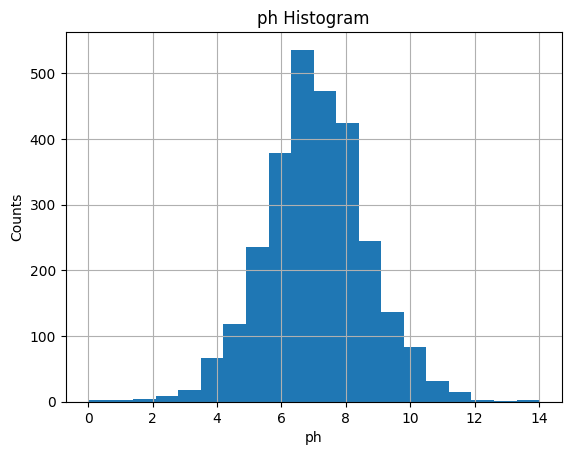

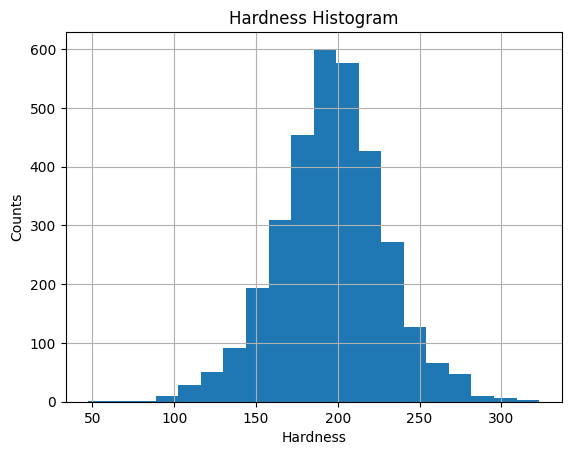

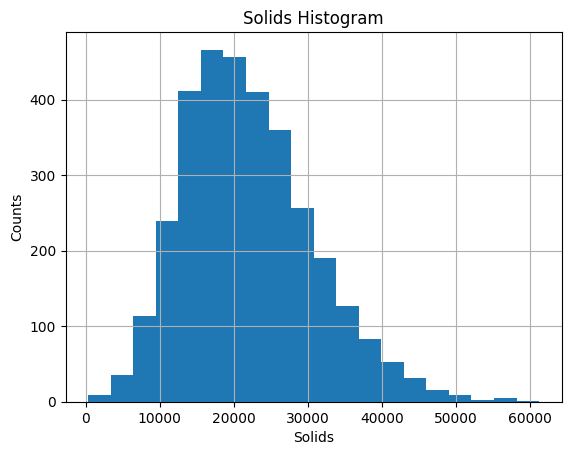

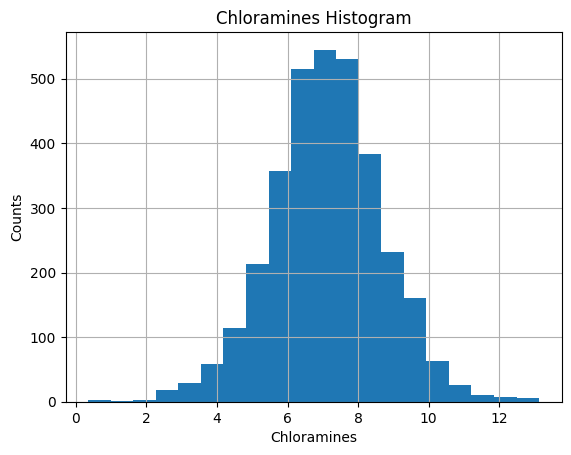

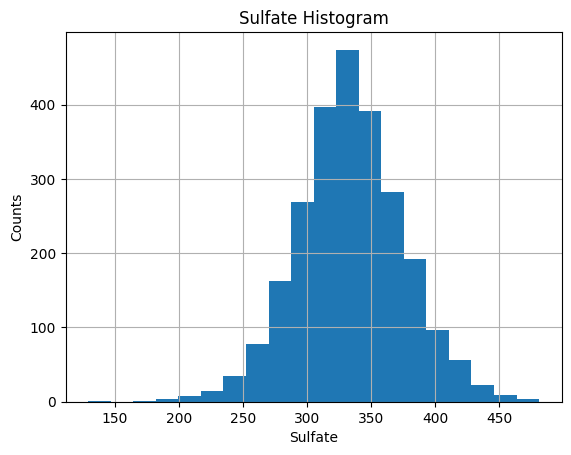

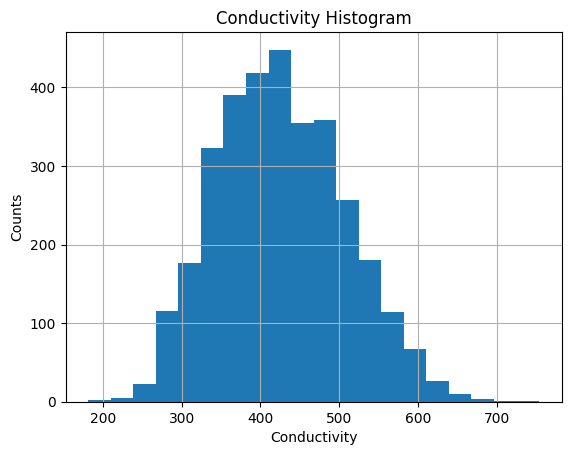

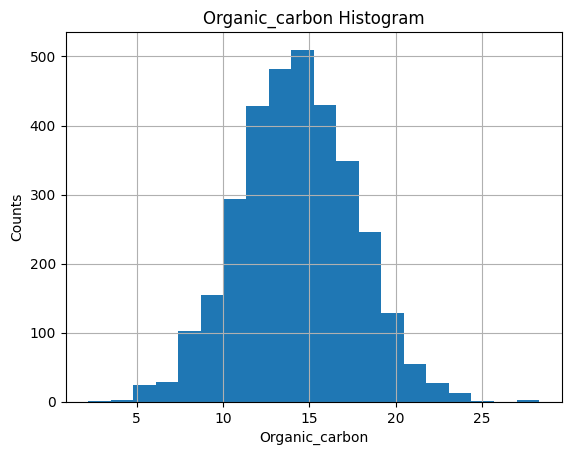

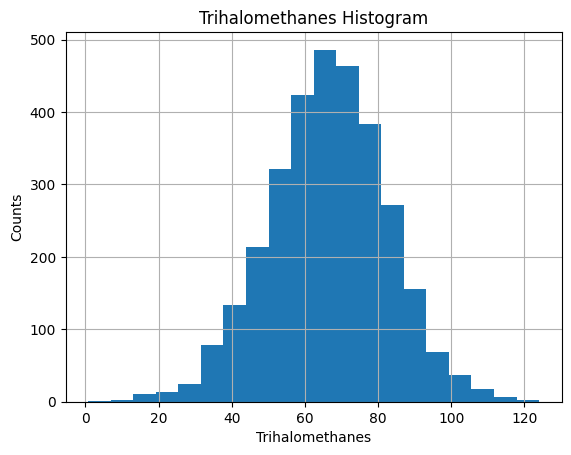

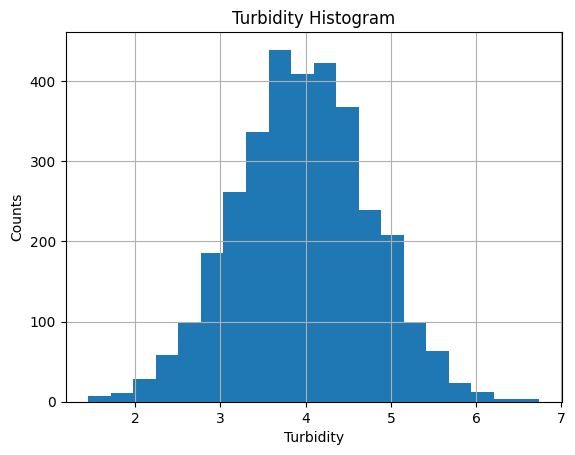

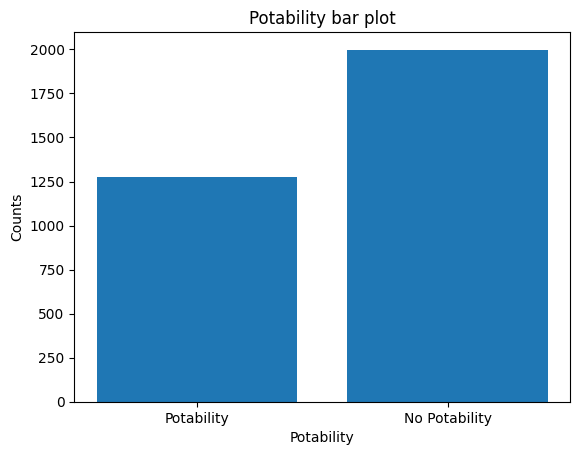

In [682]:
df['ph'].hist(bins=20)
plt.title('ph Histogram')
plt.xlabel('ph')
plt.ylabel('Counts')
plt.show()
df['Hardness'].hist(bins=20)
plt.title('Hardness Histogram')
plt.xlabel('Hardness')
plt.ylabel('Counts')
plt.show()
df['Solids'].hist(bins=20)
plt.title('Solids Histogram')
plt.xlabel('Solids')
plt.ylabel('Counts')
plt.show()
df['Chloramines'].hist(bins=20)
plt.title('Chloramines Histogram')
plt.xlabel('Chloramines')
plt.ylabel('Counts')
plt.show()
df['Sulfate'].hist(bins=20)
plt.title('Sulfate Histogram')
plt.xlabel('Sulfate')
plt.ylabel('Counts')
plt.show()
df['Conductivity'].hist(bins=20)
plt.title('Conductivity Histogram')
plt.xlabel('Conductivity')
plt.ylabel('Counts')
plt.show()
df['Organic_carbon'].hist(bins=20)
plt.title('Organic_carbon Histogram')
plt.xlabel('Organic_carbon')
plt.ylabel('Counts')
plt.show()
df['Trihalomethanes'].hist(bins=20)
plt.title('Trihalomethanes Histogram')
plt.xlabel('Trihalomethanes')
plt.ylabel('Counts')
plt.show()
df['Turbidity'].hist(bins=20)
plt.title('Turbidity Histogram')
plt.xlabel('Turbidity')
plt.ylabel('Counts')
plt.show()
potability,noPotability = 0,0
for i in df['Potability']:

    if i == 1:
        potability +=1
    else:
        noPotability +=1

plt.bar(['Potability','No Potability'],[potability,noPotability])
plt.title('Potability bar plot')
plt.xlabel('Potability')
plt.ylabel('Counts')
plt.show()


There are 3276 samples and there are 3 variables containing missing values (ph - 14.98%, sulfate - 23.84%, trihalomethanes 4.94%). The total percentage of samples with a value missing is 38.61%.\\
Out of the samples 1998 (60.98%) are potable and 1278 (39.01) are non potable. \\
Overall, the quality of the data is not ideal. Even though by looking at the histograms, most variables appear to be normally distributed around the mean, Potability outcomes are not evenly distributed to positives and negatives, solids appear to have data values completely made up (std: 8768.570828 and max value:61227.196008) and finally the total samples percentage with missing values are 38.6% of the dataframe. 


In [683]:

#3276 samples 
print("missing values counts per variable")
print(df.isnull().sum())
print("missing values percentages per variable")
print(df.isnull().sum()/3276*100)
print("No potability samples:", noPotability)
print("Potability samples:", potability)
total_missing_rows = len(df) - len(df.dropna())
print("total missing value samples:", total_missing_rows)
print("total missing value samples percentage:", total_missing_rows/3276*100,"%")


missing values counts per variable
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
missing values percentages per variable
ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64
No potability samples: 1998
Potability samples: 1278
total missing value samples: 1265
total missing value samples percentage: 38.614163614163616 %


# 2.  
According to WHO, the recommended pH levels for potable water range from 6.5 to 8.5. This can be verified using the dataset, since for  6.5 <= ph <= 8.5 the potable percentage is 43.9% while for ph < 6.5 it is 36.7% and for ph > 8.5 the potable percentage is 33.12%.

In [684]:
mask1 = df['ph'] < 6.5
mask2 = (df['ph'] >= 6.5) & (df['ph'] <= 8.5)
mask3 = df['ph'] > 8.5
ph1 = df[['ph','Potability']][mask1]
ph2 = df[['ph','Potability']][mask2]
ph3 = df[['ph','Potability']][mask3]

potability1,noPotability1 = 0,0
for i in ph1['Potability']:

    if i == 1:
        potability1 +=1
    else:
        noPotability1 +=1


potability2,noPotability2 = 0,0
for i in ph2['Potability']:

    if i == 1:
        potability2 +=1
    else:
        noPotability2 +=1

potability3,noPotability3 = 0,0
for i in ph3['Potability']:

    if i == 1:
        potability3 +=1
    else:
        noPotability3 +=1

print("ph < 6.5 non potable:", noPotability1, "Potable:", potability1,)
print("6.5 <= ph <= 8.5 non potable:", noPotability2, "Potable:", potability2)
print("ph > 8.5 non potable:", noPotability3, "Potable:", potability3)
print()
print("percentage of non potable samples with ph < 6.5:", noPotability1/(noPotability1+potability1)*100,"%")
print("percentage of non potable samples with 6.5 <= ph <= 8.5:", noPotability2/(noPotability2+potability2)*100,"%")
print("percentage of non potable samples with ph > 8.5:", noPotability3/(noPotability3+potability3)*100,"%")
print()
print("percentage of potable samples with ph < 6.5:", potability1/(noPotability1+potability1)*100,"%")
print("percentage of potable samples with 6.5 <= ph <= 8.5:", potability2/(noPotability2+potability2)*100,"%")
print("percentage of potable samples with ph > 8.5:", potability3/(noPotability3+potability3)*100,"%")

ph < 6.5 non potable: 612 Potable: 356
6.5 <= ph <= 8.5 non potable: 745 Potable: 583
ph > 8.5 non potable: 327 Potable: 162

percentage of non potable samples with ph < 6.5: 63.22314049586777 %
percentage of non potable samples with 6.5 <= ph <= 8.5: 56.09939759036144 %
percentage of non potable samples with ph > 8.5: 66.87116564417178 %

percentage of potable samples with ph < 6.5: 36.77685950413223 %
percentage of potable samples with 6.5 <= ph <= 8.5: 43.90060240963856 %
percentage of potable samples with ph > 8.5: 33.12883435582822 %


# 3.
By looking at the scatter plot, it is clear that ph and chloramines can not be used to easily seperate the potable and non potable samples.


Text(0, 0.5, 'Chloramines')

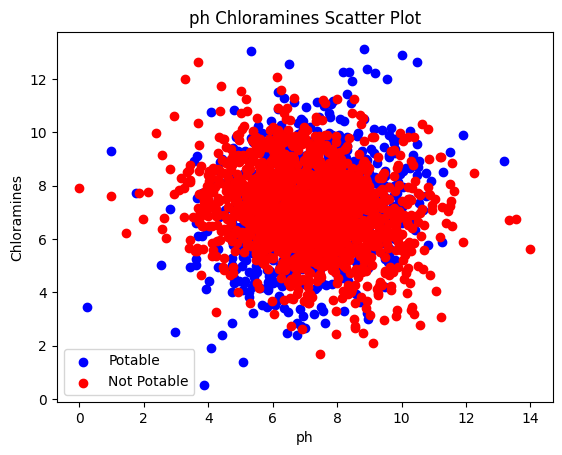

In [685]:
drinkable = df['Potability'] == 1
notDrinkable = df['Potability'] == 0
phToChloramines_drinkable = df[['ph','Chloramines']][drinkable]
phToChloramines_notDrinkable = df[['ph','Chloramines']][notDrinkable]
plt.scatter(phToChloramines_drinkable['ph'],phToChloramines_drinkable['Chloramines'],color='blue',label='Potable')
plt.scatter(phToChloramines_notDrinkable['ph'],phToChloramines_notDrinkable['Chloramines'],color='red',label='Not Potable')
plt.legend()
plt.title('ph Chloramines Scatter Plot')
plt.xlabel('ph')
plt.ylabel('Chloramines')

# 4. 
Here, missing values are being filled with the mean value of the corresponding variable.

In [686]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

# 5. 
On this step, data is loaded to numpy arrays with y being the Potability variable and x being all other variables. Also the dataset is split into train and test sets (70%/30%) with seed=0.

In [687]:
input_df = df.drop(columns=['Potability'])
targets_df = df['Potability']

x = input_df.to_numpy()
y = targets_df.to_numpy()
#x.shape, y.shape

In [688]:
seed = 0
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
print("x used for training:" , x_train.shape,
      "\ny used for training:",y_train.shape,
      "\nx used for validation:" , x_test.shape,
      "\ny used for validation:" , y_test.shape)

x used for training: (2293, 9) 
y used for training: (2293,) 
x used for validation: (983, 9) 
y used for validation: (983,)


# 6.
On this step a Decision Tree is trained with random_state=0 on x_train and y_train and is used to predict y_train using x_train and y_test using x_test.
The accuracy on the train set is 100%, a strong sign of overfitting and the accuracy on the test set is only 57.4%, which is extremely bad. considering that the classification problem had only 2 possible outcomes (1 and 0).

In [689]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
y_pred_train = tree.predict(x_train)
y_pred_test = tree.predict(x_test)

print("Accuracy on train:", accuracy_score(y_train, y_pred_train))
print("Accuracy on test:", accuracy_score(y_test, y_pred_test))

Accuracy on train: 1.0
Accuracy on test: 0.5747711088504578


# 7.
Here different hyperparameters are tested for training the decision tree model, creating 2*3*2*2*2*2 = 96 different models. All models' accuracies were calculated on train and test sets and a pandas frame is created with each column being a hyperparameter + 2 extra columns for train and test accuracy.

In [690]:
criterions = ['gini','entropy']
max_depths = [None,3,5]
min_samples_split = [2,5]
min_samples_leafs = [1,2]
max_features = [None,'sqrt']
cost_complexity_pruning = [0.0,0.01]
all_results = []
for criterion in criterions:
    for max_depth in max_depths:
        for min_samples_split_val in min_samples_split:
            for min_samples_leaf in min_samples_leafs:
                for max_feature in max_features:
                    for ccp in cost_complexity_pruning:
                        tree = DecisionTreeClassifier(random_state=0,criterion=criterion,
                                                      max_depth=max_depth,
                                                      min_samples_split=min_samples_split_val,
                                                      min_samples_leaf=min_samples_leaf,
                                                      max_features=max_feature,
                                                      ccp_alpha=ccp)
                        tree.fit(x_train, y_train)
                        y_pred_train = tree.predict(x_train)
                        y_pred_test = tree.predict(x_test)
                        acc_train = accuracy_score(y_train, y_pred_train)
                        acc_test = accuracy_score(y_test, y_pred_test)
                        row = {'Criterion':criterion,
                                   'Max Depth':max_depth,
                                   'Min Samples Split':min_samples_split_val,
                                   'Min Samples Leaf':min_samples_leaf,
                                   'Max Features':max_feature,
                                   'CCP Alpha':ccp,
                                   'Train Acc':acc_train,
                                   'Test Acc':acc_test}
                        all_results.append(row)
results_df = pd.DataFrame(all_results)
print(results_df)

   Criterion  Max Depth  Min Samples Split  Min Samples Leaf Max Features  \
0       gini        NaN                  2                 1         None   
1       gini        NaN                  2                 1         None   
2       gini        NaN                  2                 1         sqrt   
3       gini        NaN                  2                 1         sqrt   
4       gini        NaN                  2                 2         None   
..       ...        ...                ...               ...          ...   
91   entropy        5.0                  5                 1         sqrt   
92   entropy        5.0                  5                 2         None   
93   entropy        5.0                  5                 2         None   
94   entropy        5.0                  5                 2         sqrt   
95   entropy        5.0                  5                 2         sqrt   

    CCP Alpha  Train Acc  Test Acc  
0        0.00   1.000000  0.574771  
1

# 8.
After creating the DataFrame in step 7, the model with the best test accuracy and max_depth=3 is found (63.9% accuracy), retrained and visualised using plot_tree.
The rules of the tree there can be clearly seen. 
The root of the tree is the rule Sulfate<=259.026. If this is true, the tree moves to the left subtree where it checks if Solids<=21161.408.
If this rule is true, the next node is based on the rule ph<=7.904.
If this is true, the sample is non Potable, otherwise it's Potable.
If Solids<=21161.408 is false, the next rule becomes Hardness<=220.901, where either if its true or false the sample is classified as Potable. So, if Solids<=21161.408 is false the sample is classified as Potable. 
If now the root rule Sulfate<=259.026 is false, the tree moves to the right subtree where it first checks the rule Sulfate<=387.328. If this condition is true, the next node rule is ph<=4.636, where it always classifies samples as non potable either if its true or not. If Sulfate<=387.328 is false, the node rule is ph<=7.069, where if true samples are classified as Potable, otherwise as non potable.

Best test accuracy with max depth 3:
 0.6398779247202442
Best hyperparameters with max depth 3:
   Criterion  Max Depth  Min Samples Split  Min Samples Leaf Max Features  \
64   entropy        3.0                  2                 1         None   

    CCP Alpha  Train Acc  Test Acc  
64        0.0   0.641082  0.639878  


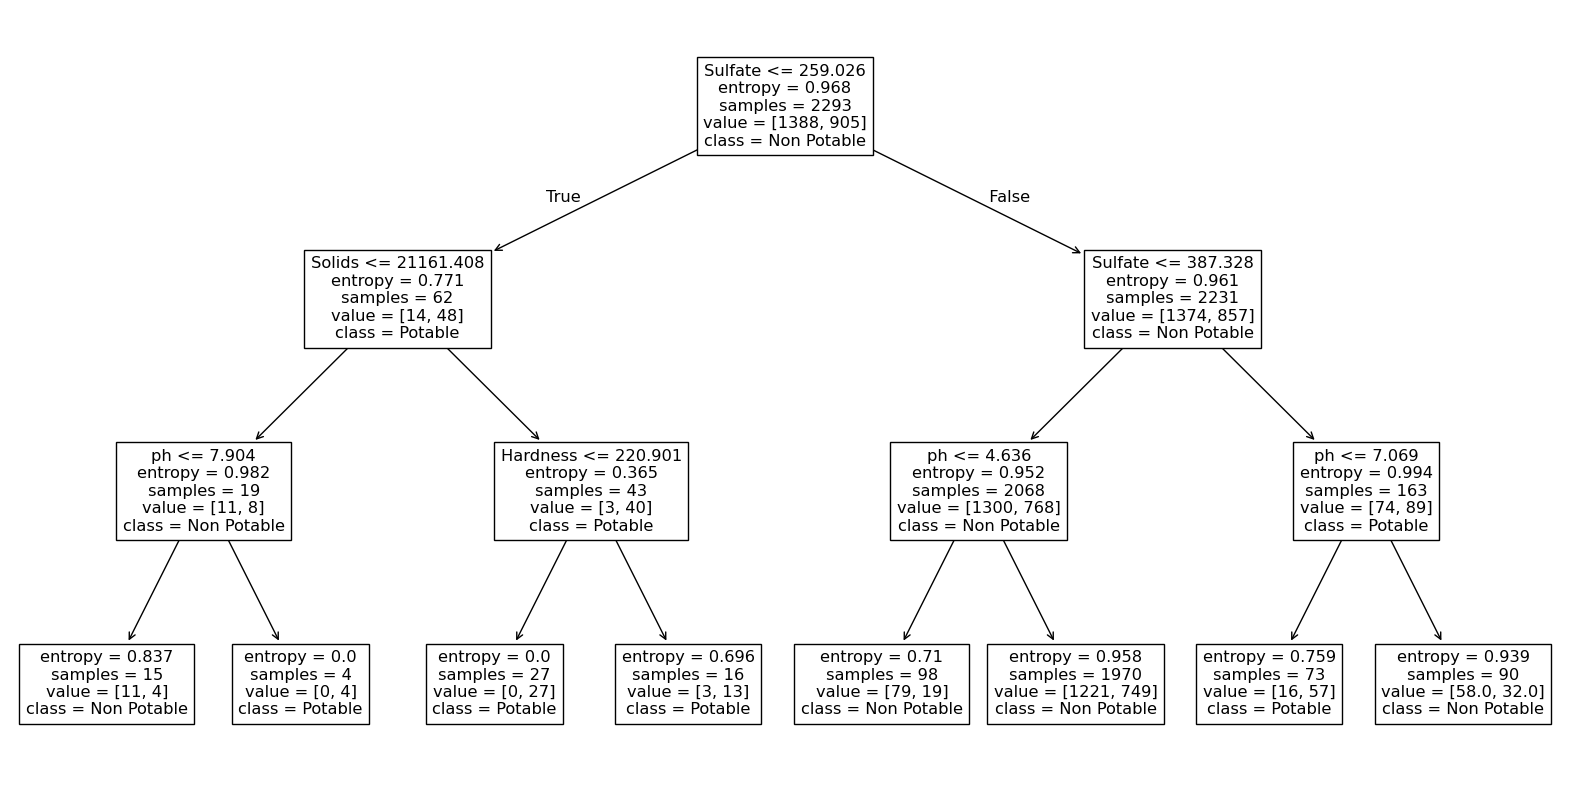

In [691]:

maskMaxDepth = results_df['Max Depth'] == 3

best = results_df[maskMaxDepth]['Test Acc'].max(axis=0)
print("Best test accuracy with max depth 3:\n", best)

best_params = results_df[maskMaxDepth][results_df[maskMaxDepth]['Test Acc'] == best][0:1]

print("Best hyperparameters with max depth 3:")
print(best_params)


best_tree = DecisionTreeClassifier(random_state=0,criterion=best_params['Criterion'].values[0],
                                   max_depth=3,
                                   min_samples_split=best_params['Min Samples Split'].values[0],
                                   min_samples_leaf=best_params['Min Samples Leaf'].values[0],
                                   max_features=best_params['Max Features'].values[0],
                                   ccp_alpha=best_params['CCP Alpha'].values[0])
best_tree.fit(x_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(best_tree, feature_names=input_df.columns, class_names=['Non Potable','Potable'])
plt.show()



# 9.
The best combination of variables model had a test accuracy of 65.5%.
A bar plot with it's Feature importances shows that the most important variable for classifying potability is Sulfate, then pH, then Solids and finally Hardness, with no other variable taking a role in the classification at all.
So if a machine supports <=5 chemical analyses to test water, by using the 4 mentioned above, an accuracy of 65.5% can be achieved.

Best result
 0.6551373346897253
Best hyperparameters:
   Criterion  Max Depth  Min Samples Split  Min Samples Leaf Max Features  \
84   entropy        5.0                  2                 2         None   

    CCP Alpha  Train Acc  Test Acc  
84        0.0   0.671173  0.655137  


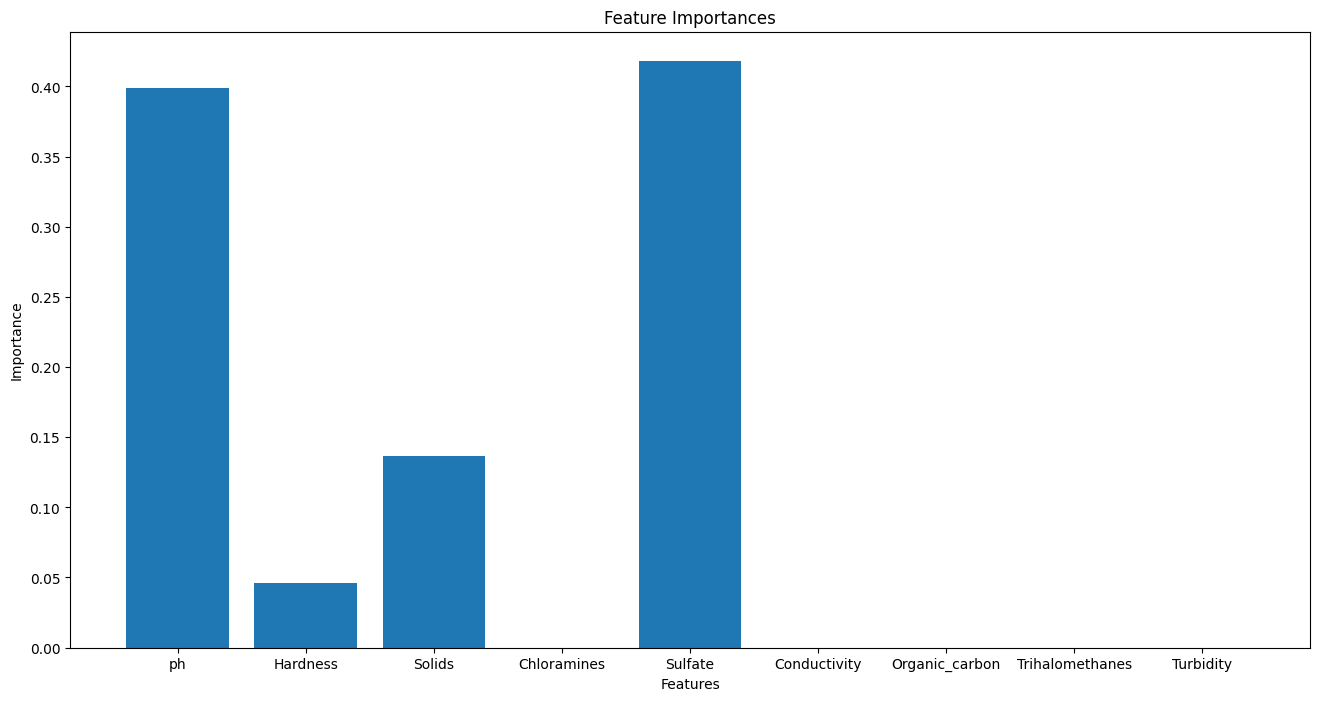

In [692]:
#best test result with max depth 3
best = results_df['Test Acc'].max(axis=0)
print("Best result\n", best)

best_params = results_df[results_df['Test Acc'] == best][0:1]

print("Best hyperparameters:")
print(best_params)


best_tree = DecisionTreeClassifier(random_state=0,criterion=best_params['Criterion'].values[0],
                                   max_depth=3,
                                   min_samples_split=best_params['Min Samples Split'].values[0],
                                   min_samples_leaf=best_params['Min Samples Leaf'].values[0],
                                   max_features=best_params['Max Features'].values[0],
                                   ccp_alpha=best_params['CCP Alpha'].values[0])
best_tree.fit(x_train, y_train)


plt.figure(figsize=(16,8))  
plt.bar(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'], best_tree.feature_importances_)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')

plt.show()

# 10.
Random forests by bootstrapping samples and creating many different decision tree models with different feature sets instead of having one decision tree train on the starting samples with all features, essentially creates a model that can generalize a lot better. Each tree focuses on different aspects of the dataset and they all vote for a general good solution. That is especially important for decision trees tend to overfit a lot on the train data but are unable to generlize as it can bee seen from the models trained above.

# 11. 
On this step, it can be verified that random forest do in fact improve accuracy on the test set.

In [693]:
n_estimators = [50,100,200]

for n_estimator in n_estimators:
    forest = RandomForestClassifier(random_state=0, n_estimators=n_estimator)
    forest.fit(x_train, y_train)
    y_pred_train = forest.predict(x_train)
    y_pred_test = forest.predict(x_test)
    print("Random Forest with", n_estimator, "trees")
    print("Accuracy on train:", accuracy_score(y_train, y_pred_train))
    print("Accuracy on test:", accuracy_score(y_test, y_pred_test))


Random Forest with 50 trees
Accuracy on train: 1.0
Accuracy on test: 0.6937945066124109
Random Forest with 100 trees
Accuracy on train: 1.0
Accuracy on test: 0.6978636826042727
Random Forest with 200 trees
Accuracy on train: 1.0
Accuracy on test: 0.6897253306205493


# 12.
It is preferred for a model to perform better on classifying true negatives (non potable water) and losing accuracy on classifying true positives (potable water) than classifying correctly potable water and losing accuracy on non potable. The reason is that classifying a non potable water as potable can cause serious harm on human health, but classifying a potable water as non potable is not actually dangerous.

# 13.
For a company, its legally safer to use a decision tree model instead of a random forest because even though the random forest will probably be more accurate, its decision is not interpretable, since the result is based on the voting of many tree models. Decision trees on the other hand can clearly provide the rules that lead to a decision, so humans can easily verify them.
